# Car Price Prediction (Exp1 and Exp2)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [5]:
df.head(20)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [6]:
df.shape

(205, 26)

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [10]:
df=df.drop_duplicates()

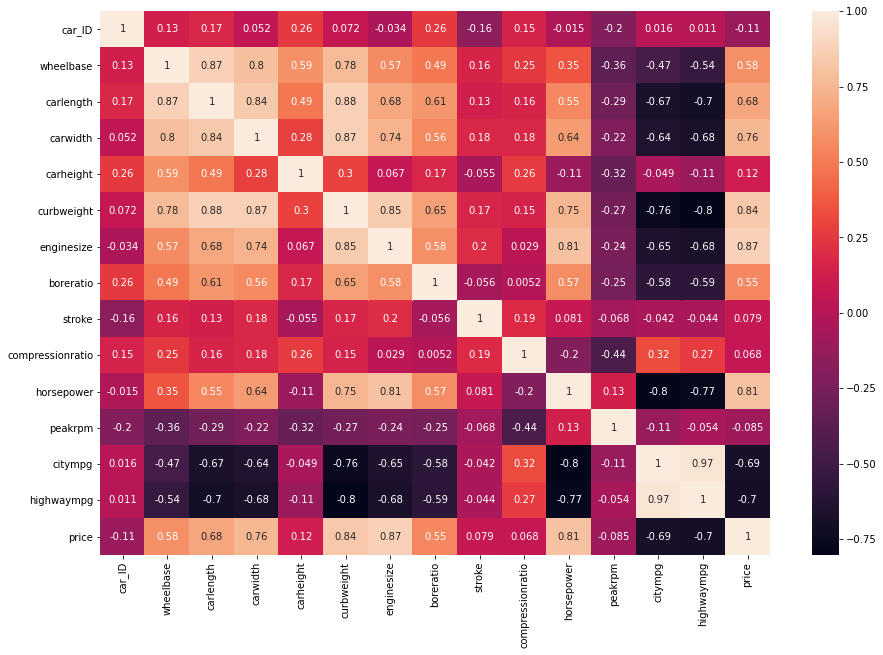

In [13]:
corr=df.corr()
ax,fig=plt.subplots(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [41]:
X = df[['symboling', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber','enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = df['price']

In [42]:

df_categorical = X.select_dtypes(include=['object'])

df_dummies = pd.get_dummies(df_categorical, drop_first=True)

X = X.drop(list(df_categorical.columns), axis=1)

X = pd.concat([X, df_dummies], axis=1)

In [43]:
print(X.shape)
print(y.shape)

(205, 44)
(205,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [61]:
model_lr.score(X_train,y_train)

0.9560064835102834

In [73]:
model_lr.score(pred,y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 6256.12387524 17362.5661493  14248.50952659 -7474.0405253
 10312.22376074 12613.35006648  6188.12796383  6254.70236143
 15976.22283478  7620.96357554 19341.87341747 30597.56427156
 12733.29533521 15057.49850792  6704.03949252 12481.22454174
  8159.74719036 19356.59760593  8868.90687142  7633.27914768
  9430.75330535 19584.0344351   7817.78469425 13244.36868563
 20848.88460409  6982.79289205  7976.531211   19477.98468207
  7748.6365215   5166.93151143  9502.45728809 11311.06810377
 17362.58255266  8352.45630705  5768.16721963 29405.64997524
 13326.48683195 13100.70048029  5979.74405506 38480.11608673
  6168.34990711 14981.8521554  33108.50579648 26602.99140981
 12186.68983429  8493.60580149  7271.63223296 13053.53074737
 11082.11392823 10183.28471681 23022.94385678  6871.99604154
  8935.99177336  9867.03075462 20897.2511405  17299.30415948
 11047.92914609 19786.0420737  10916.79844719  6747.75957653
  1854.33550109 13799.84454241].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [57]:
pred = model.predict(X_test)
pred

array([ 6256.12387524, 17362.5661493 , 14248.50952659, -7474.0405253 ,
       10312.22376074, 12613.35006648,  6188.12796383,  6254.70236143,
       15976.22283478,  7620.96357554, 19341.87341747, 30597.56427156,
       12733.29533521, 15057.49850792,  6704.03949252, 12481.22454174,
        8159.74719036, 19356.59760593,  8868.90687142,  7633.27914768,
        9430.75330535, 19584.0344351 ,  7817.78469425, 13244.36868563,
       20848.88460409,  6982.79289205,  7976.531211  , 19477.98468207,
        7748.6365215 ,  5166.93151143,  9502.45728809, 11311.06810377,
       17362.58255266,  8352.45630705,  5768.16721963, 29405.64997524,
       13326.48683195, 13100.70048029,  5979.74405506, 38480.11608673,
        6168.34990711, 14981.8521554 , 33108.50579648, 26602.99140981,
       12186.68983429,  8493.60580149,  7271.63223296, 13053.53074737,
       11082.11392823, 10183.28471681, 23022.94385678,  6871.99604154,
        8935.99177336,  9867.03075462, 20897.2511405 , 17299.30415948,
      

In [54]:
y_test

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
        ...   
198    18420.0
143     9960.0
24      6229.0
30      6479.0
135    15510.0
Name: price, Length: 62, dtype: float64

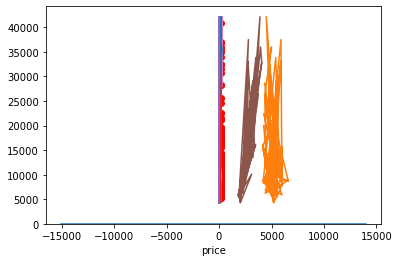

In [66]:
sns.distplot(predictions-y_test)
plt.scatter(X_train['carlength'], y_train, color='red')
plt.plot(X_train, model_lr.predict(X_train))